# Exploritory Analysis

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [4]:
# read dataframes
reviews = pd.read_pickle('C:/Users/frede/.spyder-py3/py dir/Capstone/resturantreviews')      
restaurants = pd.read_pickle('C:/Users/frede/.spyder-py3/py dir/Capstone/restaurants')

### Exploring the Category of a review

There are 366 categories with 95 used only once.
only the top few categories are useful for grouping the restaurants due to the few examples in less popular categories.



C:\Users\frede\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Top 10 most frequent Categories out of 7967 Restaurants


Text(0.5, 1.0, 'frequency of top 10 categories')

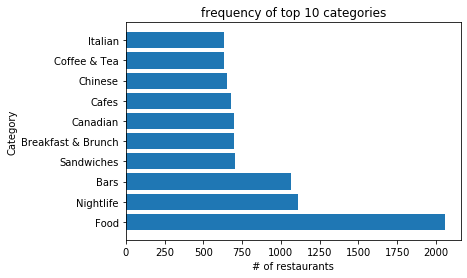

In [5]:
# bulid a dictionary and count of all categories
categoryfreq={}
for item in restaurants['categories']:
    for word in item.split(", "):
        if word not in categoryfreq:
            categoryfreq[word]=0
        categoryfreq[word]+=1

sorted (categoryfreq.items(), key=lambda item: item[1])
Cfreqdf = pd.DataFrame.from_dict(categoryfreq,orient='index').reset_index()
Cfreqdf= Cfreqdf.rename(columns={'index':'category',0:'count'})
Cfreqdf=Cfreqdf.sort_values(by=['count'],ascending=False).drop([2]).reset_index()
del Cfreqdf['index']

print('There are', len(Cfreqdf),'categories with',len(Cfreqdf[Cfreqdf['count']==1]),'used only once.')
print('only the top few categories are useful for grouping the restaurants due to the few examples in less popular categories.\n')
Cfreqdf[Cfreqdf['count']==1]


# display the top 10 categories

top10=Cfreqdf.head(10)
top10.loc[5,'category']='Canadian' # rename 'Canadian (New)' to Canadian
for i in top10['category']:
    
    k=np.mean(reviews.loc[reviews.categories.str.contains(i,case=False,na=False),"review_stars"])
    starmean.append(k)
    

top10.insert(2,"average_stars",starmean,True)
print("Top 10 most frequent Categories out of 7967 Restaurants")
plt.barh(top10['category'], top10['count'])
plt.ylabel('Category')
plt.xlabel('# of restaurants')
plt.title('frequency of top 10 categories')



Text(0.5, 1.0, 'Average star rating of top 10 categories')

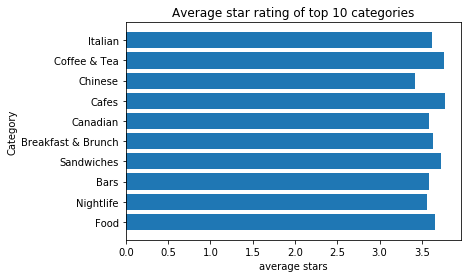

In [6]:
# display the average stars of the top 10 categories
plt.barh(top10['category'], top10['average_stars'])
plt.ylabel('Category')
plt.xlabel('average stars')
plt.title('Average star rating of top 10 categories')

### Exploring Reviews overtime

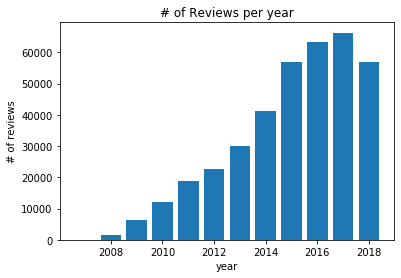

The latest review is 2018-11-14 18:04:51 which could account for the lower than expected number of reviews in 2018


In [7]:
# counting reviews and year
reviewyear=pd.value_counts(reviews['date'].dt.year).to_frame().reset_index()
reviewyear.columns=['year','count']
reviewyear=reviewyear.sort_values(by=['year'])
# plotting in a bar graph
plt.bar(reviewyear['year'],reviewyear['count'])
plt.title('# of Reviews per year')
plt.xlabel('year')
plt.ylabel('# of reviews')
plt.show()
print('The latest review is 2018-11-14 18:04:51 which could account for the lower than expected number of reviews in 2018')


### Average star ratings over time 

First 5 months omitted since they had less than 3 reviews for that month
average rating seems to increase over time at around 2012
trendline is from using line of best fit starting at 2011-07
trendline equation is y =0.00287 x +3.35
where y is the average star rating and x is the number of months since 2011-07


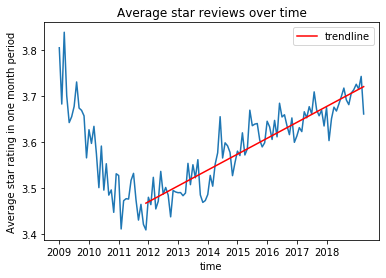

r^2 of 0.8389942112884174 for the trendline which


In [8]:
reviews['monthyear']=reviews['date'].dt.to_period('M')
a= reviews.sort_values(['monthyear']).groupby('monthyear')['review_stars'].mean().reset_index()
print('First 5 months omitted since they had less than 3 reviews for that month')
plt.plot(a['review_stars'][5:],zorder=1)
plt.xticks(list(range(5,122,12)),list(range(2009,2019)))
plt.title("Average star reviews over time")
plt.xlabel('time')
plt.ylabel('Average star rating in one month period')


reviews.sort_values(['monthyear']).groupby('monthyear')['review_stars'].count().head(10)

print("average rating seems to increase over time at around 2012")
print("trendline is from using line of best fit starting at 2011-07")
print("trendline equation is y =0.00287 x +3.35")
print("where y is the average star rating and x is the number of months since 2011-07")

x=np.array(range(40,129))
p=np.poly1d(np.polyfit(x,np.array(a['review_stars'][40:]),1))
plt.plot(x,p(x),"r",zorder=2,label='trendline')
plt.legend()

plt.show()
r=np.corrcoef(np.array(a['review_stars'][40:]),p(x))[0,1]**2
print("r^2 of",r, 'for the trendline which')

### Distirbution of # of Reviews per Restuarant

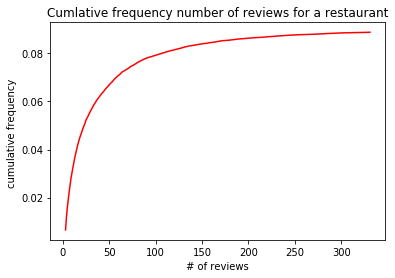

~50% of the restaurants have less than 20 review
~80% of the restaurants have less than 100 review


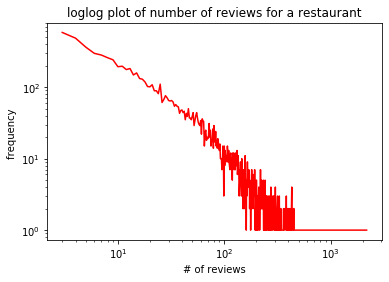

~50% of the restaurants have less than 20 review


In [9]:
r=pd.value_counts(reviews['business_id']).to_frame().reset_index()
rfreq=pd.value_counts((r['business_id'])).to_frame().reset_index().sort_values(by=['index'])
rfreq.columns=['reviews','count']



rfreq=rfreq.sort_values(by=['reviews'])
b2=plt.plot(rfreq['reviews'][0:300],np.cumsum(rfreq['count'][0:300]/88437),color='r',label='cumulative frequency')
plt.title('Cumlative frequency number of reviews for a restaurant')
plt.xlabel('# of reviews')
plt.ylabel('cumulative frequency ')
plt.show()
print("~50% of the restaurants have less than 20 review")
print("~80% of the restaurants have less than 100 review")
b3=plt.plot(rfreq['reviews'],(rfreq['count']),color='r',label='cumulative frequency')
plt.title('loglog plot of number of reviews for a restaurant')
plt.xlabel('# of reviews')
plt.ylabel('frequency ')
plt.yscale("log")
plt.xscale("log")
plt.show()
print("~50% of the restaurants have less than 20 review")

### Distirbution of # of Reviews per User

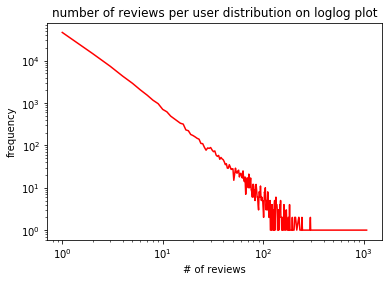

In [10]:
users=pd.value_counts(reviews['user_id']).to_frame().reset_index()
userreviews=pd.value_counts(users['user_id']).to_frame().reset_index().sort_values(by=['index'])
userreviews.columns=['reviews','count']


#plotting

plt.title('number of reviews per user distribution on loglog plot')
plt.xlabel('# of reviews')
plt.ylabel('frequency')
b4=plt.plot(userreviews['reviews'],(userreviews['count']),color='r',label='cumulative frequency')

plt.yscale("log")
plt.xscale("log")

plt.show()

### Distribution of stars

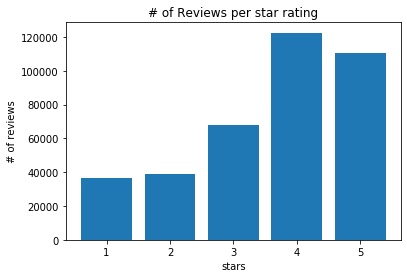

In [11]:

reviewstars=pd.value_counts(reviews['review_stars']).to_frame().reset_index().sort_values(by=['index'])
reviewstars.columns=['stars','count']
#plotting
plt.bar(reviewstars['stars'],reviewstars['count'])
plt.title('# of Reviews per star rating')
plt.xlabel('stars')
plt.ylabel('# of reviews')
plt.show()


### Distribution of Number of Characters in Reviews

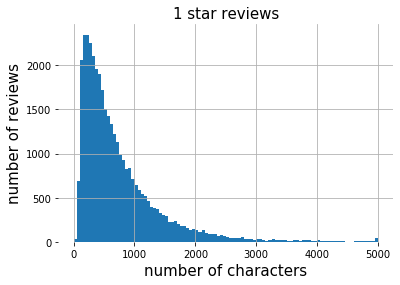

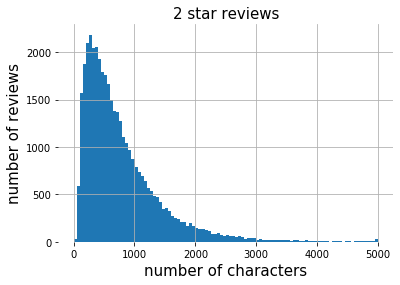

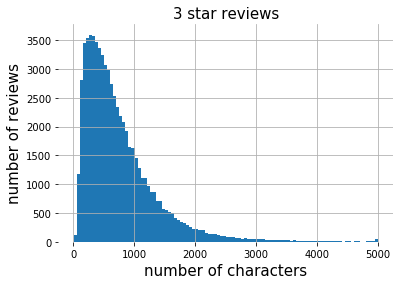

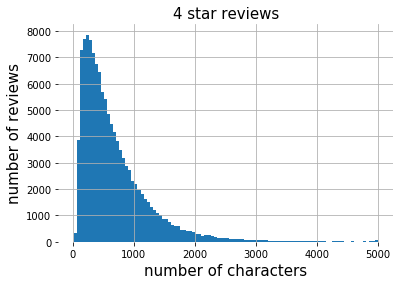

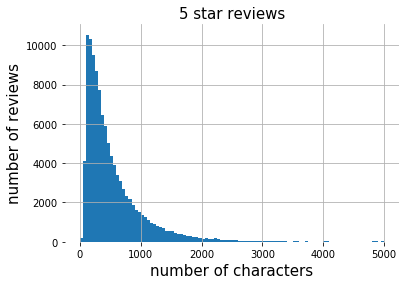

In [13]:
for i in range(1,6):

    plt.hist(reviews['text'][reviews['review_stars']==i].apply(len),bins=100)
    plt.title(str(i)+' star reviews',fontsize=15)
    plt.grid(True)
    plt.box(False)
    plt.xlabel('number of characters',fontsize=15)
    plt.ylabel('number of reviews',fontsize=15)   

    plt.show()

 


    

In [15]:
reviews['text'][reviews['review_stars']==1]
reviewchar=pd.value_counts(reviews['text'].apply(len)).to_frame().reset_index().sort_values(by=['index'])
reviewchar.columns=['char','count']
print('the mean number of characters per review is', np.mean(reviewchar['char']))

the mean number of characters per review is 2292.485234899329
